In [34]:
import pandas as pd
import os
import json
from ast import literal_eval

In [59]:
path_files = "outputs/"
files = os.listdir(path_files)
files

['trace_example_duration_3000_output.txt',
 'trace_200k_duration_3000_output.txt',
 'out_200k.txt',
 'out_trace_example.txt']

In [60]:
wanted_file = files[1]

In [62]:
dict_df = {}
for name in (files):

    with open(os.path.join(path_files, name), "r") as f:
        a = []
        for line in f:
            if line.startswith("{"):
                a.append(json.loads(line))
                
    dict_df[name] = pd.DataFrame(a)

In [67]:
dict_df["out_200k.txt"]

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
0,193,24,0,1389,126,35,1,12648429
1,250,24,0,1390,126,35,2,12648429
2,308,24,0,1390,126,40,3,12648429
3,366,24,0,1390,126,45,4,12648429
4,424,24,0,1390,126,50,5,12648429
5,482,24,0,1390,126,55,6,12648429
6,539,24,0,1390,126,60,7,12648429
7,597,24,0,1390,126,65,8,12648429
8,655,24,0,1390,126,70,9,12648429
9,713,24,0,1390,126,75,10,12648429


In [68]:
dict_df['out_trace_example.txt']

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
0,144,24,0,1389,126,35,1,12648429
1,209,24,0,1390,126,35,2,12648429
2,273,24,0,1390,126,40,3,12648429
3,338,24,0,1390,126,45,4,12648429
4,402,24,0,1390,126,50,5,12648429
5,467,24,0,1390,126,55,6,12648429
6,531,24,0,1390,126,60,7,12648429
7,596,24,0,1390,126,65,8,12648429
8,660,24,0,1390,126,70,9,12648429
9,725,24,0,1390,126,75,10,12648429


In [70]:
dict_df['trace_example_duration_3000_output.txt']

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
0,139,24,0,1389,126,35,1,12648429
1,143,24,0,1390,126,35,2,12648429
2,147,24,0,1390,126,40,3,12648429
3,150,24,0,1390,126,45,4,12648429
4,154,24,0,1390,126,50,5,12648429
...,...,...,...,...,...,...,...,...
437,4943,24,0,1390,126,4835,438,12648429
438,4947,24,0,1390,126,4840,439,12648429
439,4974,24,0,1389,126,4870,440,12648429
440,4978,24,0,1390,126,4870,441,12648429


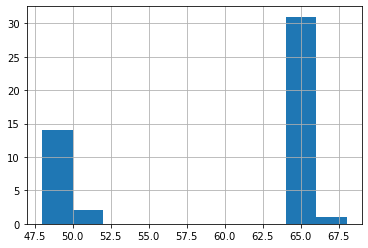

In [71]:
dict_df['out_trace_example.txt']["arrival_time_ms"].diff()[1:].hist()

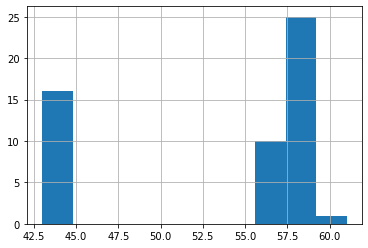

In [72]:
dict_df['out_200k.txt']["arrival_time_ms"].diff()[1:].hist()